<a href="https://colab.research.google.com/github/SaadUSheikh/SafetyandclassificationwithSParktensorpytorch/blob/main/FashionmodelswithTFipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip3 install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [2]:
import numpy as np

import tensorflow as tf

train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train

labels = labels.astype(np.int32)

images = images/256

train_ds = tf.data.Dataset.from_tensor_slices((images, labels))

train_ds = train_ds.batch(32)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


label:9


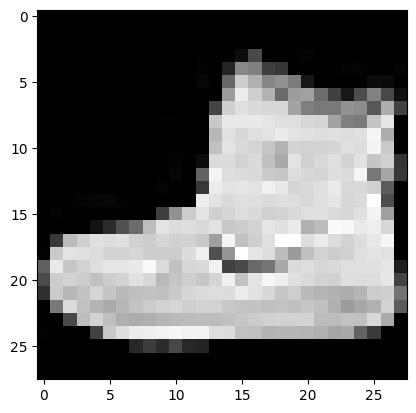

In [3]:
from matplotlib import pyplot as plt

print ("label:" + str(labels[0]))

pixels = images[0]

plt.imshow(pixels, cmap='gray')

plt.show()

In [4]:
model = tf.keras.Sequential([

   tf.keras.layers.Flatten(),

   tf.keras.layers.Dense(100, activation="relu"),

   tf.keras.layers.Dense(50, activation="relu"),

   tf.keras.layers.Dense(10),

   tf.keras.layers.Softmax()

])

model.compile(optimizer='adam',

              loss=tf.keras.losses.SparseCategoricalCrossentropy(),

              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])



model.fit(train_ds, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.6517 - sparse_categorical_accuracy: 0.7739
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3849 - sparse_categorical_accuracy: 0.8600
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3402 - sparse_categorical_accuracy: 0.8729
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3137 - sparse_categorical_accuracy: 0.8851
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2927 - sparse_categorical_accuracy: 0.8915
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2759 - sparse_categorical_accuracy: 0.8973
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2630 - sparse_categorical_accuracy: 0.9010
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2525 - sparse_categorical_accuracy: 0.9055
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2405 - sparse_categorical_accuracy: 0.9095
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━

In [5]:
images_test, labels_test = test

labels_test = labels_test.astype(np.int32)



images_test = images_test/256



test_ds = tf.data.Dataset.from_tensor_slices((images_test, labels_test))

test_ds = train_ds.batch(32)

test_ds = train_ds.shuffle(30)



results = model.evaluate(test_ds)

print("test loss, test acc:", results)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2600 - sparse_categorical_accuracy: 0.9012
test loss, test acc: [0.25737428665161133, 0.9013833403587341]


In [6]:
predictions = model.predict(test[0])

predicted_labels = np.argmax(predictions, axis=1)

m = tf.keras.metrics.Accuracy()

m.update_state(predicted_labels, test[1])

m.result().numpy()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.843

In [7]:
model.save("my_model.keras")